# Covid Analysis

## Tabel of Contents

- [Import Libraries](#import)
- [Data Cleaning](#data)
    - [Covid Data](#covid)
    - [Mask Data](#mask)
    - [Combine Data](#combine)
- [Feature Engineering](#feature)
- [Analysis](#analysis)
- [Predictions](#predict)

<a id = "import"></a>
## Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_covid = pd.read_csv("data/us-counties.csv")
data_covid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
data_mask = pd.read_csv("data/mask-use-by-county.csv")
data_mask.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


<a id = "data"></a>
## Data Cleaning

<a id = "covid"></a>
### Covid Data

In [4]:
 data_covid.isna().sum()

date         0
county       0
state        0
fips      7305
cases        0
deaths       0
dtype: int64

In [5]:
data_covid = data_covid.dropna()
data_covid.fips = data_covid.fips.astype(int)
data_covid = data_covid.sort_values(by=['fips','date'], ascending=[True, True])
data_covid.head()

,date,county,state,fips,cases,deaths
9480,2020-03-24,Autauga,Alabama,1001,1,0
10835,2020-03-25,Autauga,Alabama,1001,4,0
12367,2020-03-26,Autauga,Alabama,1001,6,0
14025,2020-03-27,Autauga,Alabama,1001,6,0
15803,2020-03-28,Autauga,Alabama,1001,6,0


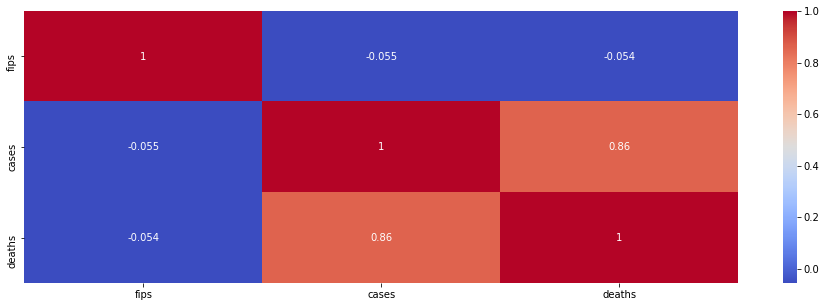

In [8]:
cols = data_covid.columns[:50]
plt.figure(figsize = (16,5))
sns.heatmap(data_covid[cols].corr(), annot = True, cmap= 'coolwarm', fmt='.2g')

<a id = "mask"></a>
### Mask Data

In [6]:
data_mask.isna().sum()

COUNTYFP      0
NEVER         0
RARELY        0
SOMETIMES     0
FREQUENTLY    0
ALWAYS        0
dtype: int64

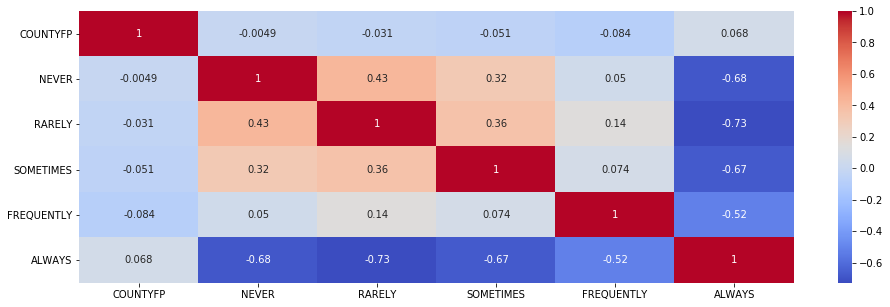

In [9]:
cols = data_mask.columns[:50]
plt.figure(figsize = (16,5))
sns.heatmap(data_mask[cols].corr(), annot = True, cmap= 'coolwarm', fmt='.2g')

<a id = "combine"></a>
### Combine Data

<a id = "feature"></a>
## Feature Engineering